# Analysis of Potato biochem data
Jupyter lab 

date: 30 - 5 - 2020

Modules: pandas, scipy, numpy, researchpy, statsmodels, matplotlib, seaborn
##### Contact
Gordonw.wellman@kaust.edu.sa

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt 
import seaborn as sns

file = "data/Raw data Fig 1&2.xlsx"
sheet = "data"

df = pd.read_excel(open(file, 'rb'), sheet_name=sheet)  
df = df.drop(columns = ['Rep'])
df['Group'] = df['Treatment']+df['Var']
df
#print(df.columns)
#df.group

,Var,Treatment,TPC,TF,DDPH,POD,PPO,Group
0,Bari,control,1.575758,0.965055,6.303030,8.1,81.0,controlBari
1,Bari,control,1.391919,1.103516,5.567677,6.7,67.0,controlBari
2,Bari,control,1.589899,0.883736,6.359596,8.9,89.0,controlBari
3,Bari,20 mM LiCl,0.705051,0.987033,2.820202,6.6,66.0,20 mM LiClBari
4,Bari,20 mM LiCl,0.824242,1.077143,3.296970,6.5,65.0,20 mM LiClBari
5,Bari,20 mM LiCl,0.806061,0.932088,3.224242,6.9,69.0,20 mM LiClBari
6,Bari,150 mM Mannitol,1.755556,0.901319,7.022222,4.9,49.0,150 mM Mannitol Bari
7,Bari,150 mM Mannitol,1.523232,1.169451,6.092929,5.0,50.0,150 mM Mannitol Bari
8,Bari,150 mM Mannitol,1.771717,0.903516,7.086869,5.3,53.0,150 mM Mannitol Bari
9,Spunta,control,1.676768,0.956264,6.707071,42.5,155.0,controlSpunta


In [2]:
Vars = ["TPC", "TF","DDPH","POD","PPO"]
Var_titles = ['TPC (g.$kg^-$$^1$)','TFC (g.$kg^-$$^1$)','DDPH (μg.$40μl^-$$^1$)','POD (units.$g^-$$^1$$.min^-$$^1$)','PPO (units.$g^-$$^1$$.min^-$$^1$)']
print(Var_titles)
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[Vars[0]]
summary
#error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
#print(error_bars)

['TPC (g.$kg^-$$^1$)', 'TFC (g.$kg^-$$^1$)', 'DDPH (μg.$40μl^-$$^1$)', 'POD (units.$g^-$$^1$$.min^-$$^1$)', 'PPO (units.$g^-$$^1$$.min^-$$^1$)']




N      Mean        SD        SE  95% Conf.  Interval
Var    Treatment                                                             
Bari   150 mM Mannitol   3  1.683502  0.139032  0.080270   1.526172  1.840832
       20 mM LiCl        3  0.778451  0.064214  0.037074   0.705787  0.851116
       control           3  1.519192  0.110448  0.063767   1.394208  1.644176
Spunta 150 mM Mannitol   3  1.590572  0.169557  0.097894   1.398701  1.782444
       20 mM LiCl        3  1.500337  0.157865  0.091143   1.321696  1.678977
       control           3  1.538047  0.131938  0.076175   1.388745  1.687350

In [3]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = round(float(p.get_height()),2)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def show_txt_on_bars(axs, h_v="v", space=0, txt = []):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for idx in range(0,len(ax.patches)):
                p = ax.patches[idx]                
                txt_val = txt[idx]                                                                          
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + txt_val[1]
                ax.text(_x, _y, txt_val[0], ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_base(axs, h_v="v", space=0.004):
    def _show_on_single_plot_base(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y()
                value = round(float(p.get_height()),2)
                ax.text(_x, _y, "%.2f" % round(value, 2), ha="center",fontsize='x-small') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left",fontsize='smaller')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot_base(ax)
    else:
        _show_on_single_plot_base(axs)


        
# Draw a nested boxplot to show bills by day and time
Vars = ["TPC", "TF","DDPH","POD","PPO"]

def get_figure(var, txt = [],axis_titles = ["Treatment", "var"]):
    plt.clf()
    sns.set_style('white')
    sns.set_context('paper', font_scale=2)
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x="Treatment", y=var,
                         hue="Var", ci="sd", palette=["white", "grey"], 
                         errcolor=".2", edgecolor=".2",
                         capsize=.05,
                         color = "white",
                         data=df)  
    
    sns.despine(offset=0, trim=False)                            
    ax.get_legend().remove()
    show_values_on_bars_base(ax, "v", 1.3)
    show_txt_on_bars(ax, "v", 1.3, txt)
    plt.xlabel(axis_titles[0])
    plt.ylabel(axis_titles[1])

    plt.tight_layout()
            
#for var in Vars:
#    txt = [("a",error_bars[0]),("b",error_bars[1]),("c",error_bars[2]),("d",error_bars[3]),("e",error_bars[4]),("f",error_bars[5])]    
#    get_figure(var, txt)
#    break
    #plt.savefig("figures/"+var+".png")                
    #plt.clf()

## ANOVA of Total Phenol Content

In [4]:
plt.clf()
val = 0
# Create model
var = Vars[val]
var_title = Var_titles[val] 
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[var]
print(summary)
print("Testing for: ",var)
formula = var+ ' ~ Var + Treatment + Var:Treatment'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# shapiro_test, p = shapiro(df[var])
# print('Shapiro-Test: Statistics=%.3f, p=%.3f' % (shapiro_test, p))
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')
# pyplot.hist(df[var])
# pyplot.show()
    
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Group'], alpha=0.05)

print(m_comp.summary())



                         N      Mean        SD        SE  95% Conf.  Interval
Var    Treatment                                                             
Bari   150 mM Mannitol   3  1.683502  0.139032  0.080270   1.526172  1.840832
       20 mM LiCl        3  0.778451  0.064214  0.037074   0.705787  0.851116
       control           3  1.519192  0.110448  0.063767   1.394208  1.644176
Spunta 150 mM Mannitol   3  1.590572  0.169557  0.097894   1.398701  1.782444
       20 mM LiCl        3  1.500337  0.157865  0.091143   1.321696  1.678977
       control           3  1.538047  0.131938  0.076175   1.388745  1.687350
Testing for:  TPC
                 sum_sq    df          F    PR(>F)
Var            0.209830   1.0  11.795857  0.004944
Treatment      0.821799   2.0  23.099254  0.000077
Var:Treatment  0.585335   2.0  16.452693  0.000364
Residual       0.213461  12.0        NaN       NaN
              Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1         

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

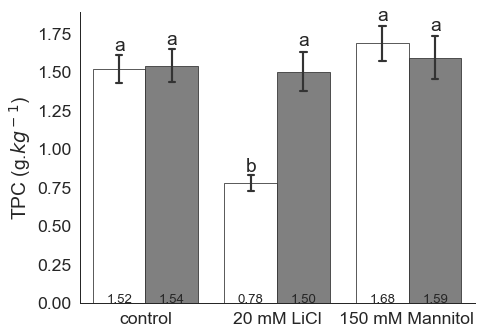

In [5]:
letters = "abaaaa"
corrections = [0.01,0.01,0.01,0.01,0.01,0.01]
error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
txt = [(letters[0],error_bars[0]+corrections[0]),(letters[1],error_bars[1]+corrections[1]),(letters[2],error_bars[2]+corrections[2]),(letters[3],error_bars[3]+corrections[3]),(letters[4],error_bars[4]+corrections[4]),(letters[5],error_bars[5]+corrections[5])]    
titles = ("",var_title)
get_figure(var,txt,titles)
plt.savefig("figures/"+var+".png")          

## ANOVA and Graph of Total Flavonoid Content

In [6]:
plt.clf()
val = 1
# Create model
var = Vars[val]
var_title = Var_titles[val] 
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[var]
print(summary)
print("Testing for: ",var)
formula = var+ ' ~ Var + Treatment + Var:Treatment'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# shapiro_test, p = shapiro(df[var])
# print('Shapiro-Test: Statistics=%.3f, p=%.3f' % (shapiro_test, p))
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')
# pyplot.hist(df[var])
# pyplot.show()
    
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Group'], alpha=0.05)

print(m_comp.summary())



                         N      Mean        SD        SE  95% Conf.  Interval
Var    Treatment                                                             
Bari   150 mM Mannitol   3  0.991429  0.154175  0.089013   0.816963  1.165895
       20 mM LiCl        3  0.998755  0.073234  0.042282   0.915882  1.081627
       control           3  0.984103  0.111121  0.064156   0.858357  1.109848
Spunta 150 mM Mannitol   3  1.093993  0.031570  0.018227   1.058268  1.129717
       20 mM LiCl        3  0.954066  0.168229  0.097127   0.763697  1.144435
       control           3  0.960659  0.055077  0.031799   0.898334  1.022985
Testing for:  TF
                 sum_sq    df         F    PR(>F)
Var            0.000593   1.0  0.048186  0.829940
Treatment      0.018716   2.0  0.760705  0.488602
Var:Treatment  0.019006   2.0  0.772484  0.483526
Residual       0.147625  12.0       NaN       NaN
             Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1                

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

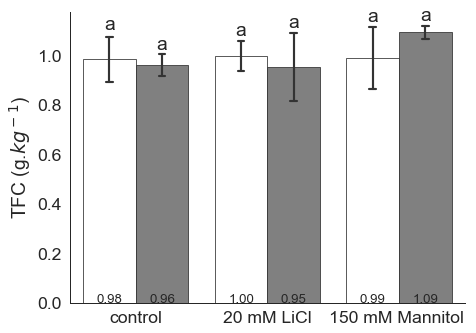

In [7]:
letters = "aaaaaa"
corrections = [0.01,0.01,-0.01,0.01,-0.01,0.015]
error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
txt = [(letters[0],error_bars[0]+corrections[0]),(letters[1],error_bars[1]+corrections[1]),(letters[2],error_bars[2]+corrections[2]),(letters[3],error_bars[3]+corrections[3]),(letters[4],error_bars[4]+corrections[4]),(letters[5],error_bars[5]+corrections[5])]    
titles = ("",var_title)
get_figure(var,txt,titles)
plt.savefig("figures/"+var+".png")          

## ANOVA and Graph of DDPH

In [8]:
plt.clf()
val = 2
# Create model
var = Vars[val]
var_title = Var_titles[val] 
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[var]
print(summary)
print("Testing for: ",var)
formula = var+ ' ~ Var + Treatment + Var:Treatment'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# shapiro_test, p = shapiro(df[var])
# print('Shapiro-Test: Statistics=%.3f, p=%.3f' % (shapiro_test, p))
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')
# pyplot.hist(df[var])
# pyplot.show()
    
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Group'], alpha=0.05)

print(m_comp.summary())



                         N      Mean        SD        SE  95% Conf.  Interval
Var    Treatment                                                             
Bari   150 mM Mannitol   3  6.734007  0.556129  0.321082   6.104687  7.363326
       20 mM LiCl        3  3.113805  0.256854  0.148295   2.823147  3.404463
       control           3  6.076768  0.441792  0.255069   5.576833  6.576702
Spunta 150 mM Mannitol   3  6.362290  0.678226  0.391574   5.594804  7.129775
       20 mM LiCl        3  6.001347  0.631459  0.364573   5.286784  6.715910
       control           3  6.152189  0.527754  0.304699   5.554979  6.749398
Testing for:  DDPH
                  sum_sq    df          F    PR(>F)
Var             3.357277   1.0  11.795857  0.004944
Treatment      13.148786   2.0  23.099254  0.000077
Var:Treatment   9.365365   2.0  16.452693  0.000364
Residual        3.415379  12.0        NaN       NaN
              Multiple Comparison of Means - Tukey HSD,FWER=0.05             
        group1   

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

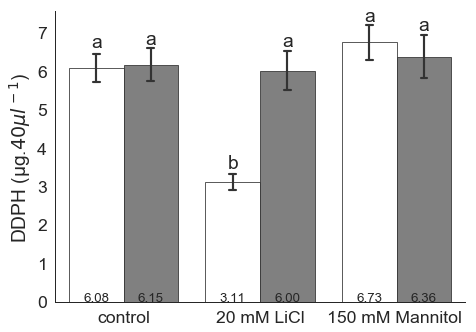

In [9]:
letters = "abaaaa"
corrections = [0.1,0.1,0.01,0.01,0.01,0.01]
error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
txt = [(letters[0],error_bars[0]+corrections[0]),(letters[1],error_bars[1]+corrections[1]),(letters[2],error_bars[2]+corrections[2]),(letters[3],error_bars[3]+corrections[3]),(letters[4],error_bars[4]+corrections[4]),(letters[5],error_bars[5]+corrections[5])]    
titles = ("",var_title)
get_figure(var,txt,titles)
plt.savefig("figures/"+var+".png")  

In [10]:
## ANOVA and Graph of PPO

In [11]:
plt.clf()
val = 3
# Create model
var = Vars[val]
var_title = Var_titles[val] 
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[var]
print(summary)
print("Testing for: ",var)
formula = var+ ' ~ Var + Treatment + Var:Treatment'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# shapiro_test, p = shapiro(df[var])
# print('Shapiro-Test: Statistics=%.3f, p=%.3f' % (shapiro_test, p))
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')
# pyplot.hist(df[var])
# pyplot.show()
    
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Group'], alpha=0.05)

print(m_comp.summary())



                         N        Mean         SD        SE  95% Conf.  \
Var    Treatment                                                         
Bari   150 mM Mannitol   3    5.066667   0.208167  0.120185   4.831104   
       20 mM LiCl        3    6.666667   0.208167  0.120185   6.431104   
       control           3    7.900000   1.113553  0.642910   6.639896   
Spunta 150 mM Mannitol   3  107.933333  10.473459  6.046854  96.081499   
       20 mM LiCl        3   98.133333   4.366158  2.520802  93.192561   
       control           3   45.700000   3.304542  1.907878  41.960558   

                           Interval  
Var    Treatment                     
Bari   150 mM Mannitol     5.302229  
       20 mM LiCl          6.902229  
       control             9.160104  
Spunta 150 mM Mannitol   119.785167  
       20 mM LiCl        103.074106  
       control            49.439442  
Testing for:  POD
                     sum_sq    df            F        PR(>F)
Var            26942.9

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

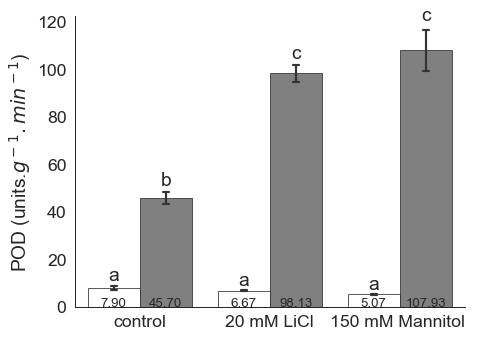

In [12]:
letters = "aaabcc"
corrections = [2,2,2,2,2,2]
error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
txt = [(letters[0],error_bars[0]+corrections[0]),(letters[1],error_bars[1]+corrections[1]),(letters[2],error_bars[2]+corrections[2]),(letters[3],error_bars[3]+corrections[3]),(letters[4],error_bars[4]+corrections[4]),(letters[5],error_bars[5]+corrections[5])]    
titles = ("",var_title)
get_figure(var,txt,titles)
plt.savefig("figures/"+var+".png")          

## ANOVA and Graph of PPO

In [13]:
plt.clf()
val = 4
# Create model
var = Vars[val]
var_title = Var_titles[val] 
summary = rp.summary_cont(df.groupby(['Var','Treatment']))[var]
print(summary)
print("Testing for: ",var)
formula = var+ ' ~ Var + Treatment + Var:Treatment'
model = sm.formula.ols(formula, data=df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# shapiro_test, p = shapiro(df[var])
# print('Shapiro-Test: Statistics=%.3f, p=%.3f' % (shapiro_test, p))
# alpha = 0.05
# if p > alpha:
#     print('Sample looks Gaussian (fail to reject H0)')
# else:
#     print('Sample does not look Gaussian (reject H0)')
# pyplot.hist(df[var])
# pyplot.show()
    
    
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df[var], groups=df['Group'], alpha=0.05)

print(m_comp.summary())



                         N        Mean         SD         SE   95% Conf.  \
Var    Treatment                                                           
Bari   150 mM Mannitol   3   50.666667   2.081666   1.201850   48.311040   
       20 mM LiCl        3   66.666667   2.081666   1.201850   64.311040   
       control           3   79.000000  11.135529   6.429101   66.398963   
Spunta 150 mM Mannitol   3   36.666667   2.081666   1.201850   34.311040   
       20 mM LiCl        3  207.000000  53.450912  30.859898  146.514599   
       control           3  144.333333  15.947832   9.207485  126.286663   

                           Interval  
Var    Treatment                     
Bari   150 mM Mannitol    53.022293  
       20 mM LiCl         69.022293  
       control            91.601037  
Spunta 150 mM Mannitol    39.022293  
       20 mM LiCl        267.485401  
       control           162.380004  
Testing for:  PPO
                     sum_sq    df          F    PR(>F)
Var         

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

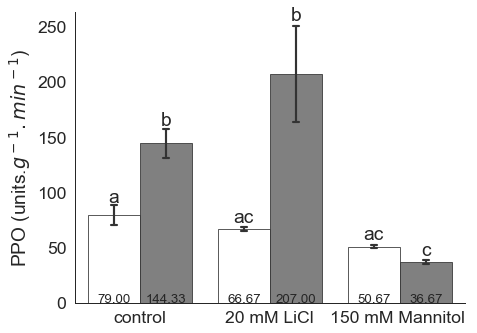

In [14]:
letters = ["a","ac","ac","b","b","c"]
corrections = [1,4,4,0.01,-5,4]
error_bars = [summary.SD[2],summary.SD[1],summary.SD[0],summary.SD[5],summary.SD[4],summary.SD[3]]
txt = [(letters[0],error_bars[0]+corrections[0]),(letters[1],error_bars[1]+corrections[1]),(letters[2],error_bars[2]+corrections[2]),(letters[3],error_bars[3]+corrections[3]),(letters[4],error_bars[4]+corrections[4]),(letters[5],error_bars[5]+corrections[5])]    
titles = ("",var_title)
get_figure(var,txt,titles)
plt.savefig("figures/"+var+".png")     